In [0]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import metrics

In [0]:
house_data = pd.read_csv("kc_house_data.csv")


In [3]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
house_data.shape

(21613, 21)

In [6]:
print("Keeping only the year for prediction")
house_data["new_date"] = house_data["date"].str.slice(stop=4)

Keeping only the year for prediction


In [7]:
house_data.columns
house_data["new_date"] = house_data["new_date"].astype('int64')

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'new_date'],
      dtype='object')

In [0]:
house_data.drop(columns = "date",axis = 1,inplace =True)

In [9]:
house_data.isna().sum()
print("There is no missing data")

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
new_date         0
dtype: int64

There is no missing data


In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
new_date         21613 non-null int64
dtypes: float64(5), int64(16)
memory usage: 3.5 MB


In [11]:
print("Univaraint Analyais")

Univaraint Analyais


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,new_date
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26728d10b8>,
      dtype=object)

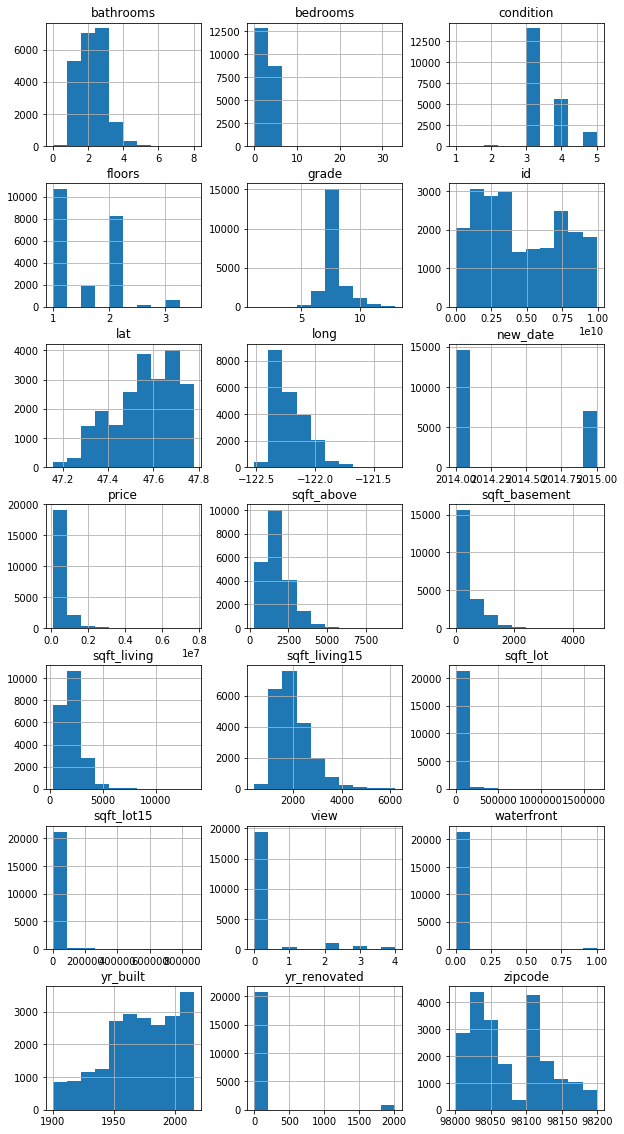

In [12]:
house_data.describe()
house_data.hist(layout = (7,3),figsize = (10,20))

In [13]:
print("Looks no. of bedrooms,batrooms are highly right skewed, Id not required can be dropped")
print("price seems to be in increasing trend")

Looks no. of bedrooms,batrooms are highly right skewed, Id not required can be dropped
price seems to be in increasing trend


In [0]:
house_data.drop(columns ="id",inplace = True,axis =1)

In [15]:
print("Bi variant analysis")

Bi variant analysis


In [0]:
independent_dependent = house_data.corr()["price"]
independent_independent = house_data.drop("price",axis =1).corr()



In [17]:
independent_dependent

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
new_date         0.003576
Name: price, dtype: float64

In [18]:
print("Correlation analyis between Independent and Dependent")
for l,k in enumerate(independent_dependent):
    if (-0.1 <= k <= 0.1):
        print ("Independent vs Dependent Weak Correlation found ",l,k)

Correlation analyis between Independent and Dependent
Independent vs Dependent Weak Correlation found  4 0.08966086058710003
Independent vs Dependent Weak Correlation found  8 0.03636178912899409
Independent vs Dependent Weak Correlation found  12 0.05401153149478604
Independent vs Dependent Weak Correlation found  14 -0.05320285429832495
Independent vs Dependent Weak Correlation found  16 0.02162624103930622
Independent vs Dependent Weak Correlation found  18 0.08244715251948594
Independent vs Dependent Weak Correlation found  19 0.0035760408824665442


In [19]:
print("sq ft.lot,condition,yr_built,zipcode,long,sqft_lot15,new_date - All these features looks to be weak contributor for prediction as the value ranges between -0.1 to 0.1")

sq ft.lot,condition,yr_built,zipcode,long,sqft_lot15,new_date - All these features looks to be weak contributor for prediction as the value ranges between -0.1 to 0.1


In [20]:
print("Correlation analyis between Independent Features")
for l, l_val in enumerate (independent_independent.columns):
    for k, values in enumerate(independent_independent.iloc[:,l]):
        if values > 0.79:
            print(independent_independent.index[k],"-",l_val,"-", independent_independent.iloc[k,l])

Correlation analyis between Independent Features
bedrooms - bedrooms - 1.0
bathrooms - bathrooms - 1.0
sqft_living - sqft_living - 1.0
sqft_above - sqft_living - 0.8765965986813212
sqft_lot - sqft_lot - 1.0
floors - floors - 1.0
waterfront - waterfront - 1.0
view - view - 1.0
condition - condition - 1.0
grade - grade - 1.0
sqft_living - sqft_above - 0.8765965986813212
sqft_above - sqft_above - 1.0
sqft_basement - sqft_basement - 1.0
yr_built - yr_built - 1.0
yr_renovated - yr_renovated - 1.0
zipcode - zipcode - 1.0
lat - lat - 1.0
long - long - 1.0
sqft_living15 - sqft_living15 - 1.0
sqft_lot15 - sqft_lot15 - 1.0
new_date - new_date - 1.0


In [21]:
print("Looks Sqft Living and sqft_above has value greater than 0.8, looks both features are almost same")

Looks Sqft Living and sqft_above has value greater than 0.8, looks both features are almost same


In [22]:
house_data["new_date"].unique()
print("Since only 2 values doing one hot encoding over the same")

array([2014, 2015])

Since only 2 values doing one hot encoding over the same


In [23]:
print("Create dummies 1st to avoid Data Leak")
house_data = pd.get_dummies(house_data, columns=['new_date'])

Create dummies 1st to avoid Data Leak


In [0]:
house_data_scaled = house_data.apply(zscore)
Y = house_data_scaled['price']
X = house_data_scaled.drop(columns = 'price')

In [81]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=2)
rmse=[]
acc=[]
for train,test in kf.split(X,Y):
    M=LinearRegression()
    Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
    Ytrain,Ytest=Y[train],Y[test]
    M.fit(Xtrain,Ytrain)
    Y_predict=M.predict(Xtest)
    acc.append(M.score((Xtrain), Ytrain))
    rmse.append(np.sqrt(metrics.mean_squared_error(Ytest,Y_predict)))
print("Cross-validated Score:%.2f%% " % np.mean(rmse))
print("Accuracy Score avg:%.2f%% " % np.mean(acc)) 
print("bias and variance error of model 3 with all columns,", np.mean(rmse),np.var(rmse))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Cross-validated Score:0.55% 
Accuracy Score avg:0.70% 
bias and variance error of model 3 with all columns, 0.5478798683368832 0.00023355567559543963


In [26]:
np.var(rmse)

0.00023355567559543963

In [27]:
print("bias and variance error of model 1 with all columns,", np.mean(rmse),np.var(rmse))

bias and variance error of model 1 with all columns, 0.5478798683368832 0.00023355567559543963


In [28]:
print("Model 2, Dropping all columns that are not contributing to prediction and do prediction")

Model 2, Dropping all columns that are not contributing to prediction and do prediction


In [0]:
#sq ft.lot,condition,yr_built,zipcode,long,sqft_lot15,new_date

In [0]:
house_data2 = pd.read_csv("kc_house_data.csv")

In [31]:
house_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [0]:
house_data2.drop(columns = ["id","sqft_lot15","condition","yr_built","sqft_lot","zipcode","long"],axis = 1, inplace =True)

In [33]:
print("Keeping only the year for prediction")
house_data2["new_date"] = house_data2["date"].str.slice(stop=4)

Keeping only the year for prediction


In [0]:
house_data2.drop(columns = ["date"],axis = 1, inplace =True)

In [35]:
print("Create dummies 1st to avoid Data Leak")
house_data2 = pd.get_dummies(house_data2, columns=['new_date'])

Create dummies 1st to avoid Data Leak


In [36]:
house_data2.info()
house_data2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
sqft_living15    21613 non-null int64
new_date_2014    21613 non-null uint8
new_date_2015    21613 non-null uint8
dtypes: float64(4), int64(9), uint8(2)
memory usage: 2.2 MB


(21613, 15)

In [0]:
house_data2_scaled = house_data2.apply(zscore)
Y2 = house_data2_scaled['price']
X2 = house_data2_scaled.drop(columns = 'price')

In [80]:
from sklearn.model_selection import KFold
kf2=KFold(n_splits=5,shuffle=True,random_state=2)
rmse2=[]
acc2=[]
for train2,test2 in kf2.split(X2,Y2):
    M2=LinearRegression()
    X2train,X2test=X2.iloc[train2,:],X2.iloc[test2,:]
    Y2train,Y2test=Y2[train2],Y2[test2]
    M2.fit(X2train,Y2train)
    Y2_predict=M2.predict(X2test)
   # print('score ',M2.score((X2train), Y2train))
    rmse2.append(np.sqrt(metrics.mean_squared_error(Y2test,Y2_predict)))
    acc2.append(M2.score((X2train), Y2train))
print("Cross-validated Score:%.2f%% " % np.mean(rmse2))
print("Accuracy Score avg:%.2f%% " % np.mean(acc2))
print("bias and variance error of model 3 with all columns,", np.mean(rmse2),np.var(rmse2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Cross-validated Score:0.58% 
Accuracy Score avg:0.66% 
bias and variance error of model 3 with all columns, 0.5818784912701016 0.0002511974407947851


In [41]:
print("bias and variance error of model 2 with all columns,", np.mean(rmse2),np.var(rmse2))

bias and variance error of model 2 with all columns, 0.5818784912701016 0.0002511974407947851


In [42]:
print("Model 3 using PCA")

Model 3 using PCA


In [53]:
from sklearn.decomposition import PCA
house_data3 = pd.read_csv("kc_house_data.csv")
print("Keeping only the year for prediction")
house_data3["new_date"] = house_data3["date"].str.slice(stop=4)
print("Create dummies 1st to avoid Data Leak")
house_data3 = pd.get_dummies(house_data3, columns=['new_date'])
house_data3.drop(columns = ["id","date","price"],axis = 1, inplace =True)

Keeping only the year for prediction
Create dummies 1st to avoid Data Leak


In [54]:
house_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
new_date_2014    21613 non-null uint8
new_date_2015    21613 non-null uint8
dtypes: float64(4), int64(14), uint8(2)
memory usage: 3.0 MB


In [55]:
X_centered = house_data3 - house_data3.mean(axis=0)
pca = PCA().fit(X_centered)
pca.explained_variance_
np.cumsum(pca.explained_variance_ratio_)
#pca.components_
X_pca = pca.transform(X_centered)




array([2.17707162e+09, 2.84181405e+08, 1.68537090e+06, 2.78815989e+05,
       1.68512722e+05, 1.48055745e+05, 2.60010779e+03, 5.95063359e+02,
       6.29182237e-01, 4.78210463e-01, 4.46517145e-01, 4.20385238e-01,
       3.36382662e-01, 2.12420422e-01, 1.24440286e-01, 1.64538028e-02,
       1.07536712e-02, 6.20152214e-03, 4.55561361e-25, 6.76670519e-33])

array([0.88371786, 0.9990729 , 0.99975702, 0.9998702 , 0.9999386 ,
       0.9999987 , 0.99999976, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Total explained variance')

(0, 63)

([<matplotlib.axis.YTick at 0x7f266cef5320>,
 <a list of 11 Text yticklabel objects>)

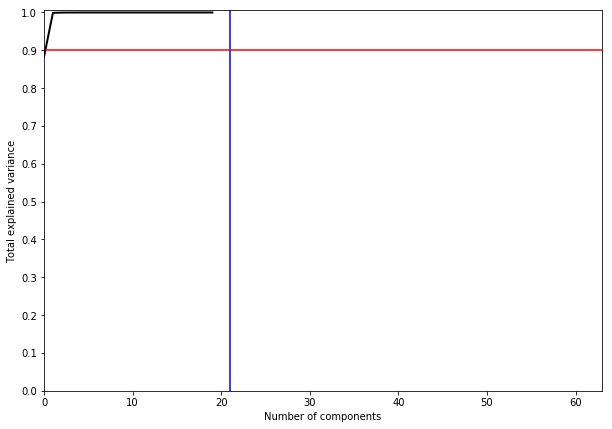

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [58]:
house_data4 = pd.read_csv("kc_house_data.csv")
print("Keeping only the year for prediction")
house_data4["new_date"] = house_data4["date"].str.slice(stop=4)
print("Create dummies 1st to avoid Data Leak")
house_data4 = pd.get_dummies(house_data4, columns=['new_date'])
house_data4.drop(columns = ["id","date"],axis = 1,inplace =True)
house_data4_scaled = house_data2.apply(zscore)
Y4 = house_data4_scaled['price']
X4 = house_data4_scaled.drop(columns = 'price')

Keeping only the year for prediction
Create dummies 1st to avoid Data Leak


In [0]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=.3)

In [63]:
X4_train_centered = X4_train - X4_train.mean(axis=0)
pca = PCA(n_components=2)
pca.fit(X4_train_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
from sklearn.model_selection import KFold
kf4=KFold(n_splits=5,shuffle=True,random_state=2)
rmse4=[]
acc4=[]
for train4,test4 in kf4.split(X4,Y4):
    M4=LinearRegression()
    X4train,X4test=X4.iloc[train4,:],X4.iloc[test4,:]
    Y4train,Y4test=Y4[train4],Y4[test4]
    M4.fit(pca.transform(X4train),Y4train)
    Y4_predict=M4.predict(pca.transform(X4test))
    acc4.append(M4.score(pca.transform(X4train), Y4train))
    rmse4.append(np.sqrt(metrics.mean_squared_error(Y4test,Y4_predict)))
print("Cross-validated Score:%.2f%% " % np.mean(rmse4))
print("Accuracy Score avg:%.2f%% " % np.mean(acc4))
print("bias and variance error of model 3 with all columns,", np.mean(rmse4),np.var(rmse4))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Cross-validated Score:0.70% 
Accuracy Score avg:0.51% 
bias and variance error of model 3 with all columns, 0.7035317585994488 0.00016713654363534873


In [66]:
print("bias and variance error of model 3 with all columns,", np.mean(rmse4),np.var(rmse4))

bias and variance error of model 3 with all columns, 0.7035317585994488 0.00016713654363534873


In [0]:
#Model - Accuracy Score avg:0.70% 
#bias and variance error of model 3 with all columns, 0.5478798683368832 0.00023355567559543963

In [0]:
#Model 2 - Accuracy Score avg:0.66% 
#bias and variance error of model 3 with all columns, 0.5818784912701016 0.0002511974407947851

In [0]:
#Model 3 - Accuracy Score avg:0.51% 
#bias and variance error of model 3 with all columns, 0.7035317585994488 0.00016713654363534873

In [82]:
print("analysing above 3 model results, looking for trade off between bias and variance error, It looks model 2 is poor.")

analysing above 3 model results, looking for trade off between bias and variance error, It looks model 2 is poor.


In [83]:
print("When comparing 1 and 3, model 3 has less variance error when compared to model 1 but, bias error seems to be peeking up by 16%")

When comparing 1 and 3, model 3 has less variance error when compared to model 1 but, bias error seems to be peeking up by 16%


In [84]:
print("Since varinace error diff is very minimal between model 1 and 3, and model 1 seems to have less bias error, Choosing model 1 as best model")

Since varinace error diff is very minimal between model 1 and 3, and model 1 seems to have less bias error, Choosing model 1 as best model


In [85]:
print("Model 1 is best")

Model 1 is best
